In [53]:
import pandas as pd
fireballs = pd.read_csv('cneos_fireball_data.csv')
fireballs.head()

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,2017-07-31 22:01:35,24.7N,118.5W,NaN,NaN,NaN,NaN,NaN,5.800000e+10,0.19
1,2017-07-23 06:12:38,6.6S,69.7W,38.0,17.2,-0.4,8.7,-14.8,3.500000e+10,0.12
2,2017-07-13 09:30:36,23.1N,60.7E,35.0,13.7,-10.0,-6.5,-6.8,7.300000e+10,0.23
3,2017-06-30 14:26:45,34.3S,134.5E,20.0,15.2,10.9,-9.7,4.2,9.400000e+10,0.29
4,2017-06-23 20:21:55,57.0N,143.7E,35.1,24.3,17.7,13.1,-10.3,1.840000e+11,0.52


In [6]:
# 1.Определите местоположение появления метеорита с наибольшим количеством высвободившейся энергии

fireballs[['Latitude (deg.)','Longitude (deg.)', 'Altitude (km)','Calculated Total Impact Energy (kt)']].sort_values(by=['Calculated Total Impact Energy (kt)'], ascending=False)[:1]

,Latitude (deg.),Longitude (deg.),Altitude (km),Calculated Total Impact Energy (kt)
146,54.8N,61.1E,23.3,440.0


In [7]:
# 2. Определите метеорит с максимальной и минимальной скоростью.
fireballs.sort_values(by=['Velocity (km/s)'], ascending=True)[:1] # минимальная скорость

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
300,2008-07-01 17:40:19,37.1N,115.7W,36.1,9.8,2.8,1.7,-9.2,3.600000e+10,0.12


In [8]:
fireballs.sort_values(by=['Velocity (km/s)'], ascending=False)[:1] # максимальная скорость

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
67,2015-07-04 01:40:11,38.6N,103.1E,46.3,49.0,0.9,-40.4,-27.7,5.600000e+10,0.18


In [105]:
# 3. Определите место максимальной концентрации метеоритов
fireballs_new = pd.read_csv('cneos_fireball_data.csv')
fireballs_new = fireballs_new[fireballs_new['Latitude (deg.)'].notnull()]
fireballs_new = fireballs_new[fireballs_new['Longitude (deg.)'].notnull()]
def get_latitude(name):
    if 'N' in name:
        return float(name.split('.')[0].strip())
    if 'S' in name:
        return -float(name.split('.')[0].strip())
def get_longitude(name):
    if 'W' in name:
        return float(name.split('.')[0].strip())
    if 'E' in name:
        return -float(name.split('.')[0].strip())    
import folium
fireballs_new['Latitude (deg.)'] = fireballs_new['Latitude (deg.)'].apply(get_latitude)
fireballs_new['Longitude (deg.)'] = fireballs_new['Longitude (deg.)'].apply(get_longitude)
latitude = fireballs_new['Latitude (deg.)']
longitude = fireballs_new['Longitude (deg.)']
altitude = fireballs_new['Altitude (km)']
map = folium.Map(location=[0,0], zoom_start = 2)
for latitude, longitude, altitude in zip(latitude, longitude, altitude):
    folium.CircleMarker(location=[latitude, longitude],radius = 3, popup=str(altitude)+" km", fill_color = 'red', color = 'red', fill_opacity = 0.9).add_to(map)
map 

In [104]:
fireballs.head()        

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,2017-07-31 22:01:35,24.7N,118.5W,NaN,15.262962,NaN,NaN,NaN,5.800000e+10,0.19
1,2017-07-23 06:12:38,6.6S,69.7W,38.0,17.200000,-0.4,8.7,-14.8,3.500000e+10,0.12
2,2017-07-13 09:30:36,23.1N,60.7E,35.0,13.700000,-10.0,-6.5,-6.8,7.300000e+10,0.23
3,2017-06-30 14:26:45,34.3S,134.5E,20.0,15.200000,10.9,-9.7,4.2,9.400000e+10,0.29
4,2017-06-23 20:21:55,57.0N,143.7E,35.1,24.300000,17.7,13.1,-10.3,1.840000e+11,0.52


In [12]:
# 4. Определите время года, в которое вероятность появления метеоритов максимальна. Постройте график.
def get_month(name):
    return name.split('-')[1].strip()
def get_season(listOfMonth):
    if (listOfMonth == '12') or (listOfMonth == '01') or (listOfMonth == '02'):
        listOfMonth = 'winter'
    if (listOfMonth == '03') or (listOfMonth == '04') or (listOfMonth == '05'):
        listOfMonth = 'spring'
    if (listOfMonth == '06') or (listOfMonth == '07') or (listOfMonth == '08'):
        listOfMonth = 'summer'
    if (listOfMonth == '09') or (listOfMonth == '10') or (listOfMonth == '11'):
        listOfMonth = 'autumn'
    return listOfMonth
fireballs['Season'] = fireballs['Peak Brightness Date/Time (UT)'].apply(get_month)
fireballs['Season'] = fireballs['Season'].apply(get_season)
fireballs.head()

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt),Season
0,2017-07-31 22:01:35,24.7N,118.5W,NaN,NaN,NaN,NaN,NaN,5.800000e+10,0.19,summer
1,2017-07-23 06:12:38,6.6S,69.7W,38.0,17.2,-0.4,8.7,-14.8,3.500000e+10,0.12,summer
2,2017-07-13 09:30:36,23.1N,60.7E,35.0,13.7,-10.0,-6.5,-6.8,7.300000e+10,0.23,summer
3,2017-06-30 14:26:45,34.3S,134.5E,20.0,15.2,10.9,-9.7,4.2,9.400000e+10,0.29,summer
4,2017-06-23 20:21:55,57.0N,143.7E,35.1,24.3,17.7,13.1,-10.3,1.840000e+11,0.52,summer


In [81]:
fireballs['Season'].value_counts().index[0] # определим, в каком сезоне чаще появлялись метеориты

'autumn'

In [4]:
# нарисуем график
from __future__ import (absolute_import, division, print_function, unicode_literals)
import warnings
warnings.simplefilter('ignore')
%pylab inline
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


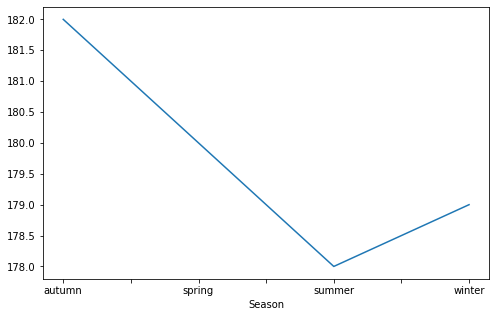

In [13]:
fireballs.groupby(['Season'])['Season'].count().plot()

In [14]:
# 5. Удалите строки данных, в которых для метеоритов не указана скорость. Выведите размер набора данных до и после удаления.
fireballs = pd.read_csv('cneos_fireball_data.csv')
fireballs # размер набора данных внизу таблицы

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,2017-07-31 22:01:35,24.7N,118.5W,NaN,NaN,NaN,NaN,NaN,5.800000e+10,0.190
1,2017-07-23 06:12:38,6.6S,69.7W,38.0,17.2,-0.4,8.7,-14.8,3.500000e+10,0.120
2,2017-07-13 09:30:36,23.1N,60.7E,35.0,13.7,-10.0,-6.5,-6.8,7.300000e+10,0.230
3,2017-06-30 14:26:45,34.3S,134.5E,20.0,15.2,10.9,-9.7,4.2,9.400000e+10,0.290
4,2017-06-23 20:21:55,57.0N,143.7E,35.1,24.3,17.7,13.1,-10.3,1.840000e+11,0.520
...,...,...,...,...,...,...,...,...,...,...
714,1993-11-29 17:48:41,26.5N,78.3E,NaN,NaN,NaN,NaN,NaN,2.600000e+10,0.092
715,1993-10-31 03:39:27,51.3N,100.9W,NaN,NaN,NaN,NaN,NaN,4.000000e+10,0.130
716,1991-10-04 09:22:47,78.7N,6.3E,NaN,NaN,NaN,NaN,NaN,5.500000e+11,1.400
717,1990-10-01 03:51:47,7.5N,142.8E,NaN,NaN,NaN,NaN,NaN,2.500000e+12,5.200


In [48]:
fireballs = fireballs[fireballs['Velocity (km/s)'].notnull()]
# новый размер набора данных внизу таблицы
fireballs

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
1,2017-07-23 06:12:38,6.6S,69.7W,38.0,17.2,-0.4,8.7,-14.8,3.500000e+10,0.12
2,2017-07-13 09:30:36,23.1N,60.7E,35.0,13.7,-10.0,-6.5,-6.8,7.300000e+10,0.23
3,2017-06-30 14:26:45,34.3S,134.5E,20.0,15.2,10.9,-9.7,4.2,9.400000e+10,0.29
4,2017-06-23 20:21:55,57.0N,143.7E,35.1,24.3,17.7,13.1,-10.3,1.840000e+11,0.52
5,2017-06-20 13:41:32,54.2S,133.0E,33.3,13.6,8.7,-5.7,8.8,6.360000e+11,1.60
...,...,...,...,...,...,...,...,...,...,...
450,2004-04-22 04:21:49,44.3S,83.3E,29.6,16.3,8.5,-12.1,-6.8,6.240000e+11,1.50
451,2004-04-06 03:24:49,12.0S,162.8E,35.0,25.6,10.5,-23.2,-2.9,4.330000e+11,1.10
462,2003-11-10 13:54:06,64.5S,136.2E,23.0,20.1,14.8,-8.7,10.4,5.180000e+11,1.30
467,2003-09-27 12:59:02,21.0N,86.6E,26.0,18.2,-1.0,-5.4,-17.3,2.150000e+12,4.60


In [16]:
# 6. Построить график, на котором по оси ОХ отложено время суток, по OY – частота появления метеоритов.
def get_time(name):
    return name.split(' ')[1].strip()
def get_hour(name):
    return int(name.split(':')[0].strip())
fireballs['Hour'] = fireballs['Peak Brightness Date/Time (UT)'].apply(get_time)
fireballs['Hour'] = fireballs['Hour'].apply(get_hour)
fireballs # определим, в какие часы падали метеориты

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt),Hour
0,2017-07-31 22:01:35,24.7N,118.5W,NaN,NaN,NaN,NaN,NaN,5.800000e+10,0.190,22
1,2017-07-23 06:12:38,6.6S,69.7W,38.0,17.2,-0.4,8.7,-14.8,3.500000e+10,0.120,6
2,2017-07-13 09:30:36,23.1N,60.7E,35.0,13.7,-10.0,-6.5,-6.8,7.300000e+10,0.230,9
3,2017-06-30 14:26:45,34.3S,134.5E,20.0,15.2,10.9,-9.7,4.2,9.400000e+10,0.290,14
4,2017-06-23 20:21:55,57.0N,143.7E,35.1,24.3,17.7,13.1,-10.3,1.840000e+11,0.520,20
...,...,...,...,...,...,...,...,...,...,...,...
714,1993-11-29 17:48:41,26.5N,78.3E,NaN,NaN,NaN,NaN,NaN,2.600000e+10,0.092,17
715,1993-10-31 03:39:27,51.3N,100.9W,NaN,NaN,NaN,NaN,NaN,4.000000e+10,0.130,3
716,1991-10-04 09:22:47,78.7N,6.3E,NaN,NaN,NaN,NaN,NaN,5.500000e+11,1.400,9
717,1990-10-01 03:51:47,7.5N,142.8E,NaN,NaN,NaN,NaN,NaN,2.500000e+12,5.200,3


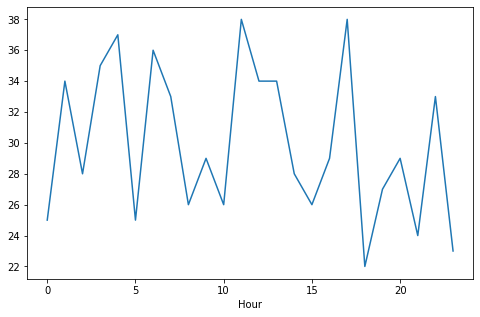

In [19]:
# построим график, где по оси ОХ отложены часы появления метеоритов, по OY – частота их появления 
fireballs.groupby(['Hour'])['Hour'].count().plot()

In [79]:
# 7. Заполните строки в которых для метеоритов не указана скорость.
fireballs = pd.read_csv('cneos_fireball_data.csv')
import random
import time
def fill_velocity(name):
    name = random.uniform(fireballs.iloc[300]['Velocity (km/s)'],fireballs.iloc[67]['Velocity (km/s)'])
    time.sleep(0.001)
    return name
fireballs.loc[fireballs['Velocity (km/s)'].isnull(), 'Velocity (km/s)'] = fireballs['Velocity (km/s)'].apply(fill_velocity)
fireballs

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,2017-07-31 22:01:35,24.7N,118.5W,NaN,15.262962,NaN,NaN,NaN,5.800000e+10,0.190
1,2017-07-23 06:12:38,6.6S,69.7W,38.0,17.200000,-0.4,8.7,-14.8,3.500000e+10,0.120
2,2017-07-13 09:30:36,23.1N,60.7E,35.0,13.700000,-10.0,-6.5,-6.8,7.300000e+10,0.230
3,2017-06-30 14:26:45,34.3S,134.5E,20.0,15.200000,10.9,-9.7,4.2,9.400000e+10,0.290
4,2017-06-23 20:21:55,57.0N,143.7E,35.1,24.300000,17.7,13.1,-10.3,1.840000e+11,0.520
...,...,...,...,...,...,...,...,...,...,...
714,1993-11-29 17:48:41,26.5N,78.3E,NaN,16.431742,NaN,NaN,NaN,2.600000e+10,0.092
715,1993-10-31 03:39:27,51.3N,100.9W,NaN,33.473359,NaN,NaN,NaN,4.000000e+10,0.130
716,1991-10-04 09:22:47,78.7N,6.3E,NaN,18.407448,NaN,NaN,NaN,5.500000e+11,1.400
717,1990-10-01 03:51:47,7.5N,142.8E,NaN,45.177071,NaN,NaN,NaN,2.500000e+12,5.200


In [21]:
# 8. Определите месяц года, для которого появление метеоритов наиболее вероятно (постройте необходимые графики).
def get_month(name):
    return int(name.split('-')[1].strip())
fireballs['Month'] = fireballs['Peak Brightness Date/Time (UT)'].apply(get_month)
fireballs.head()

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt),Hour,Month
0,2017-07-31 22:01:35,24.7N,118.5W,NaN,NaN,NaN,NaN,NaN,5.800000e+10,0.19,22,7
1,2017-07-23 06:12:38,6.6S,69.7W,38.0,17.2,-0.4,8.7,-14.8,3.500000e+10,0.12,6,7
2,2017-07-13 09:30:36,23.1N,60.7E,35.0,13.7,-10.0,-6.5,-6.8,7.300000e+10,0.23,9,7
3,2017-06-30 14:26:45,34.3S,134.5E,20.0,15.2,10.9,-9.7,4.2,9.400000e+10,0.29,14,6
4,2017-06-23 20:21:55,57.0N,143.7E,35.1,24.3,17.7,13.1,-10.3,1.840000e+11,0.52,20,6


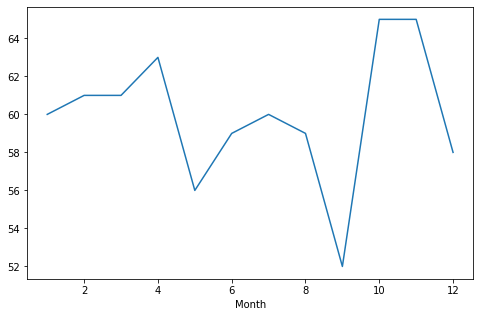

In [27]:
fireballs.groupby(['Month'])['Month'].count().plot()

In [221]:
# 9. Вычислите корреляцию Пирсона и Спирмена между признаками Altitude и Total Radiated Energy. 
# Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value.
fireballs[['Altitude (km)','Total Radiated Energy (J)']].corr() # кореляция Пирсона

,Altitude (km),Total Radiated Energy (J)
Altitude (km),1.000000,-0.085787
Total Radiated Energy (J),-0.085787,1.000000


In [228]:
pearson = fireballs[['Altitude (km)','Total Radiated Energy (J)']].corr().iloc[0]['Total Radiated Energy (J)']
pearson # Коэффициент корреляции Пирсона

-0.08578656525823583

In [229]:
fireballs[['Altitude (km)','Total Radiated Energy (J)']].corr(method='spearman') # кореляция Спирмена

,Altitude (km),Total Radiated Energy (J)
Altitude (km),1.00000,-0.12671
Total Radiated Energy (J),-0.12671,1.00000


In [230]:
spearman = fireballs[['Altitude (km)','Total Radiated Energy (J)']].corr(method='spearman').iloc[0]['Total Radiated Energy (J)']
spearman

-0.12671041939219077

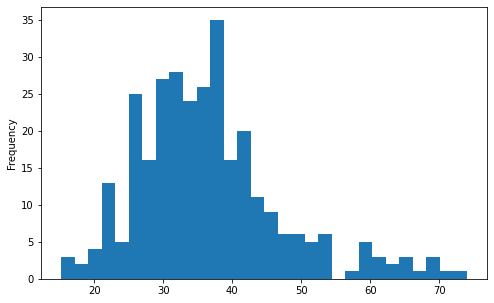

In [31]:
fireballs['Altitude (km)'].plot.hist(bins = 30)

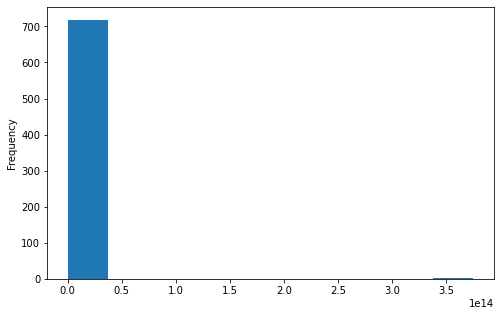

In [32]:
fireballs['Total Radiated Energy (J)'].plot.hist()

In [266]:
if (spearman<0.05):
    print("p-value is good")
else:
    print("p-value is not good")

p-value is good
